In [3]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib
import math
from matplotlib import colors as mcolors
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [5]:
# Load the txt-files with with stats from the st-pipeline

path = '../../smomics_data'

filez = ['10015CN108_C1_umi_after_seq_depth_in_spots_under_outside_tissue.txt',
         '10015CN108fl_E2_umi_after_seq_depth_in_spots_under_outside_tissue.txt',
         '5005CN107_D2_umi_after_seq_depth_in_spots_under_outside_tissue.txt',
        'visium_A1_umi_after_seq_depth_in_spots_under_outside_tissue.txt', 
        'visium_B1_umi_after_seq_depth_in_spots_under_outside_tissue.txt', 
        'visium_D1_umi_after_seq_depth_in_spots_under_outside_tissue.txt']

sample_type = {'visium_A1':'Visium',
              'visium_B1':'Visium',
               'visium_D1':'Visium',
              '10015CN108_C1': 'sm-omics',
              '10015CN108fl_E2': 'sm-omics',
              '5005CN107_D2': 'sm-omics'}

spots_under_tissue = {'visium_A1':3262,
              'visium_B1':2897,
               'visium_D1':3426,
              '10015CN108_C1': 680,
              '10015CN108fl_E2': 563,
            '5005CN107_D2':700}

spot_radium = {'visium_A1':27.5,
              'visium_B1':27.5,
               'visium_D1':27.5,
              '10015CN108_C1': 50,
              '10015CN108fl_E2': 50,
            '5005CN107_D2':50}

stats_list = []

prop_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]

for file in filez:
    filename = os.path.join(path, file)
    
    cond_file = pd.read_csv(filename, sep = '\t')
    print(cond_file)
         
    cond_file.sort_values(by='Num reads', inplace=True)
    cond_file['Prop_annot_reads'] = prop_list        
    cond_file['type'] = sample_type[cond_file['Name'][0]]
    
    # normalize uniq counts with # spots under tissue
    cond_file['norm uniq mol'] = cond_file['UMI inside']
        
    stats_list.append(cond_file)

# Concat all files
cond_merge = pd.concat(stats_list)
    
print(cond_merge.head())

# Print max value (at  Prop_annot_reads == 1)
print(cond_merge[cond_merge['Prop_annot_reads'] == 1])

            Name   UMI inside  UMI outside  Annot reads  Num reads
0  10015CN108_C1  1713.105339   710.926752      2336977    4498459
1  10015CN108_C1  1713.738817   711.812102      2337129   16217182
2  10015CN108_C1  1027.640693   426.853503      1383068    2545338
3  10015CN108_C1   616.147186   253.821656       853129    1568778
4  10015CN108_C1   202.417027    85.926752       332632     611749
5  10015CN108_C1  1713.142857   711.136943      2337203    8404700
6  10015CN108_C1   275.483405   117.923567       428272     787530
7  10015CN108_C1  1713.640693   711.601911      2337226   20123423
8  10015CN108_C1  1713.911977   710.964968      2337217   12310941
              Name   UMI inside  UMI outside  Annot reads  Num reads
0  10015CN108fl_E2  2714.259786   510.607981      3015899    6033647
1  10015CN108fl_E2  2791.645907   526.077283      3108801   59887074
2  10015CN108fl_E2  1364.777580   262.263789      1518770    3041790
3  10015CN108fl_E2  2792.537367   526.440281      3109

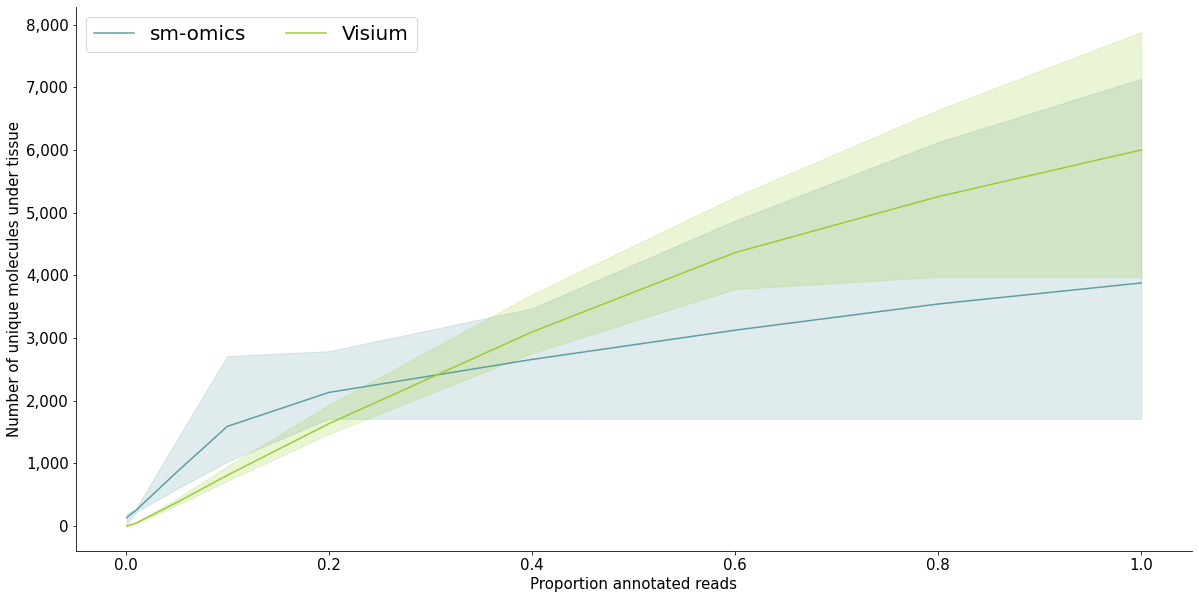

In [6]:
#Plot 
fig = plt.figure(figsize=(20, 10))
x="Prop_annot_reads"
y="norm uniq mol"
hue='type'

################ LINE PLOT

ax = sns.lineplot(x=x, y=y, data=cond_merge,hue=hue, 
                  palette = ['cadetblue', 'yellowgreen'], hue_order = ['sm-omics', 'Visium'],ci=95)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')

# X and y label size
ax.set_xlabel("Proportion annotated reads", fontsize=15)
ax.set_ylabel("Number of unique molecules under tissue", fontsize=15)

# Set ticks size
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# change background color
back_c = 'white'
ax.set_facecolor(back_c)
ax.grid(False)

# Thousand seprator on y axis
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=['sm-omics', 'Visium'],loc='upper left', ncol=2, fontsize=20)


# fig.set_size_inches(20, 10)
# plt.savefig("../../figures/saturation_sm_visium_total_umis.pdf", transparent=True, bbox_inches = 'tight',
#     pad_inches = 0, dpi=1200)
plt.show()

In [7]:
cond_merge['Prop_annot_reads'] = 100*cond_merge['Prop_annot_reads']

In [8]:
cond_merge.to_csv('../../smomics_data/sm_visium_unique_molecules_under_outside_tissue.csv')